<a href="https://colab.research.google.com/github/marcoscleytton/python-pratice/blob/main/customeranalyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregar dataset

In [27]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")

print("Path to dataset files:", path)

df = pd.read_csv(f'{path}/marketing_campaign.csv', sep='\t')
display(df.head())

Using Colab cache for faster access to the 'customer-personality-analysis' dataset.
Path to dataset files: /kaggle/input/customer-personality-analysis


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [81]:
df = df.dropna()
# vamos remover os valores nulos

In [82]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Idade,Filhos
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,68,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,71,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,60,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,41,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,58,1
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,79,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,44,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,69,1


In [30]:
df['Idade'] = 2025 - df['Year_Birth']
df['Filhos'] = df['Kidhome']+ df['Teenhome']

# agora vou criar a coluna  , filhos e idade

In [42]:
perfil = df.groupby('Education')[['Idade', 'Income', 'Filhos']].mean().round(1)
print(perfil)

# Agrupar por educação e calcular média de idade, renda e filhos
#OBS : Income é renda

            Idade   Income  Filhos
Education                         
2n Cycle     53.0  47633.2     0.9
Basic        47.5  20306.3     0.7
Graduation   55.4  52720.4     0.9
Master       58.1  52917.5     1.0
PhD          59.0  56145.3     1.0


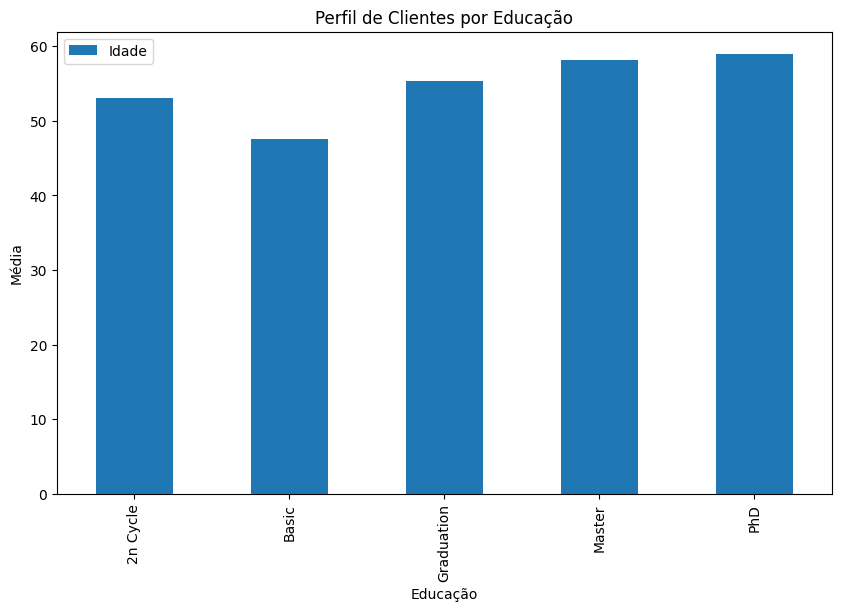

In [87]:
# visualizar em grafico
# OBS : 2n cycle é uma Pós-Graduação ou Mestrado
perfil = df.groupby('Education')[['Idade']].mean().round(1)

perfil.plot(kind='bar', figsize=(10,6))
plt.title('Perfil de Clientes por Educação')
plt.xlabel('Educação')
plt.ylabel('Média')
plt.show()

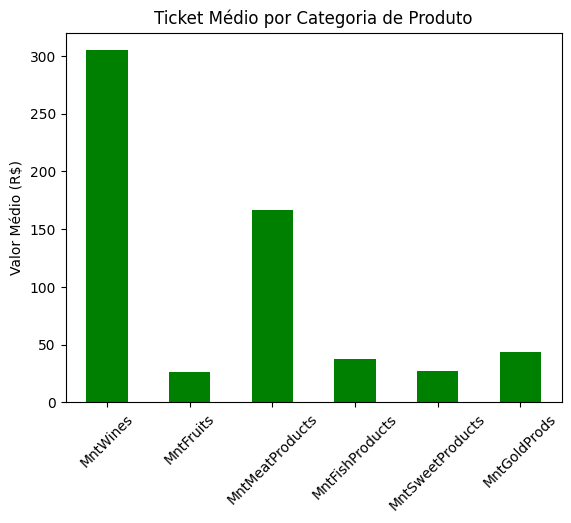

In [50]:
# Ticket Médio por Categoria
categorias = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
ticket_medio = df[categorias].mean().round(2)

# Visualizar
ticket_medio.plot(kind='bar', color='green')
plt.title('Ticket Médio por Categoria de Produto')
plt.ylabel('Valor Médio (R$)')
plt.xticks(rotation=45)
plt.show()

In [47]:
#correlação
correlacao = df[['TotalCampanhasAceitas', 'Response']].corr()
print(correlacao)

                       TotalCampanhasAceitas  Response
TotalCampanhasAceitas               1.000000  0.427124
Response                            0.427124  1.000000


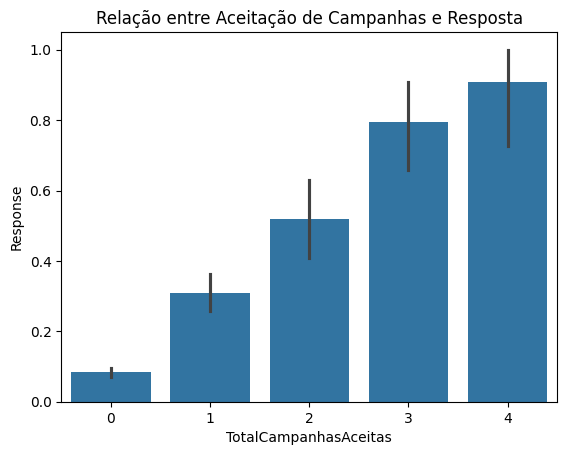

In [52]:
# Correlação entre Renda e Campanhas

campanhas = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['TotalCampanhasAceitas'] = df[campanhas].sum(axis=1)


sns.barplot(x='TotalCampanhasAceitas', y='Response', data=df)
plt.title('Relação entre Aceitação de Campanhas e Resposta')
plt.show()

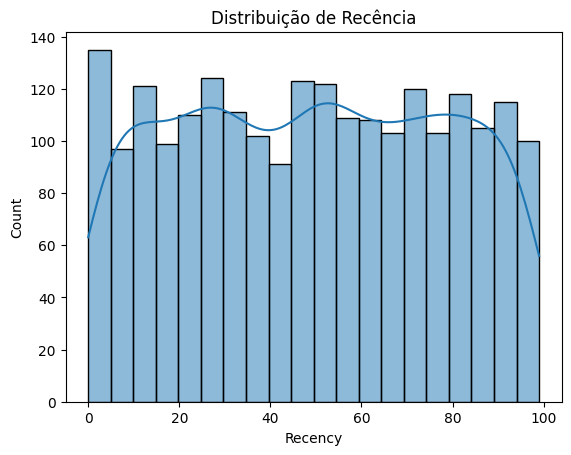

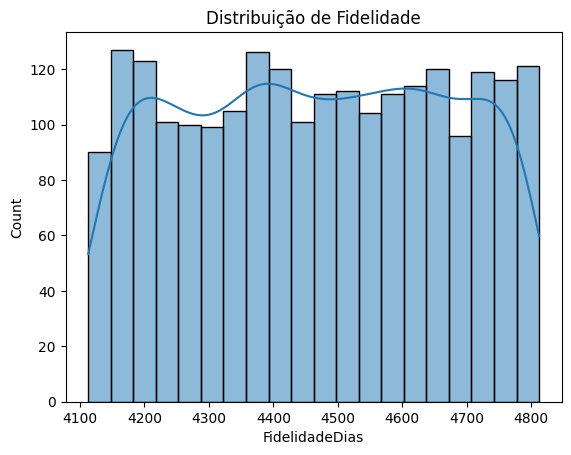

In [57]:
# Recência e Fidelidade

# Recência: dias desde última compra
sns.histplot(df['Recency'], bins=20, kde=True)
plt.title('Distribuição de Recência')
plt.show()

# Fidelidade: tempo como cliente
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['FidelidadeDias'] = (pd.to_datetime('2025-10-02') - df['Dt_Customer']).dt.days

sns.histplot(df['FidelidadeDias'], bins=20, kde=True)
plt.title('Distribuição de Fidelidade')
plt.show()

In [58]:
# Preferência por Faixa Etária ou Estado Civil

# Faixa etária
df['FaixaEtaria'] = pd.cut(df['Idade'], bins=[20,30,40,50,60,70], labels=['20-30','30-40','40-50','50-60','60-70'])

preferencia = df.groupby(['FaixaEtaria', 'Marital_Status'])[categorias].mean().round(1)
print(preferencia)


                            MntWines  MntFruits  MntMeatProducts  \
FaixaEtaria Marital_Status                                         
20-30       Absurd               NaN        NaN              NaN   
            Alone                NaN        NaN              NaN   
            Divorced             NaN        NaN              NaN   
            Married              1.5        9.0              8.0   
            Single             284.2       19.8            323.0   
            Together             NaN        NaN              NaN   
            Widow                NaN        NaN              NaN   
            YOLO                 NaN        NaN              NaN   
30-40       Absurd             471.0      102.0            125.0   
            Alone                5.0        7.0             24.0   
            Divorced           126.6       22.5            168.1   
            Married            246.0       26.1            168.5   
            Single             264.0       34.9 

/tmp/ipython-input-4134555228.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  preferencia = df.groupby(['FaixaEtaria', 'Marital_Status'])[categorias].mean().round(1)


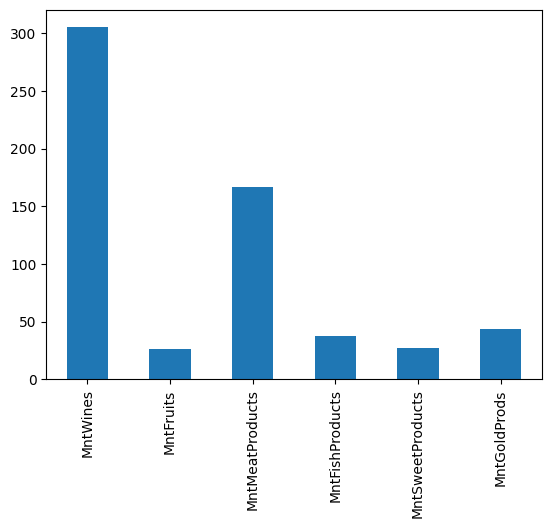

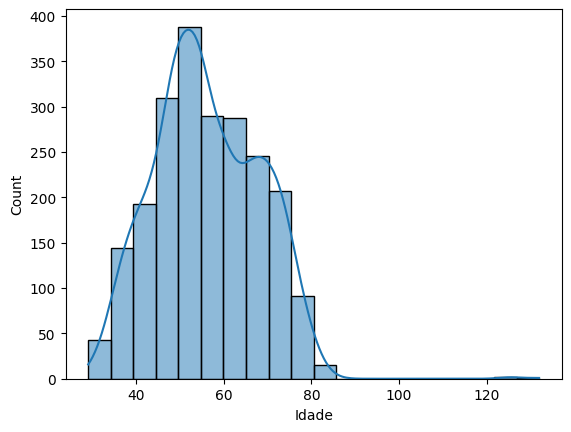

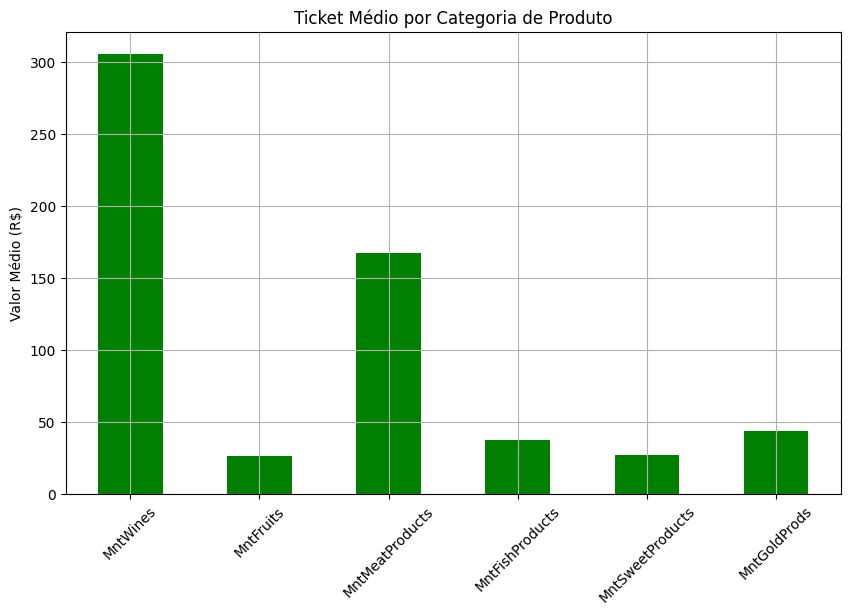

In [70]:
categorias = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
ticket_medio = df[categorias].mean()

plt.figure(figsize=(10,6))
ticket_medio.plot(kind='bar', color='green')
plt.title('Ticket Médio por Categoria de Produto')
plt.ylabel('Valor Médio (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

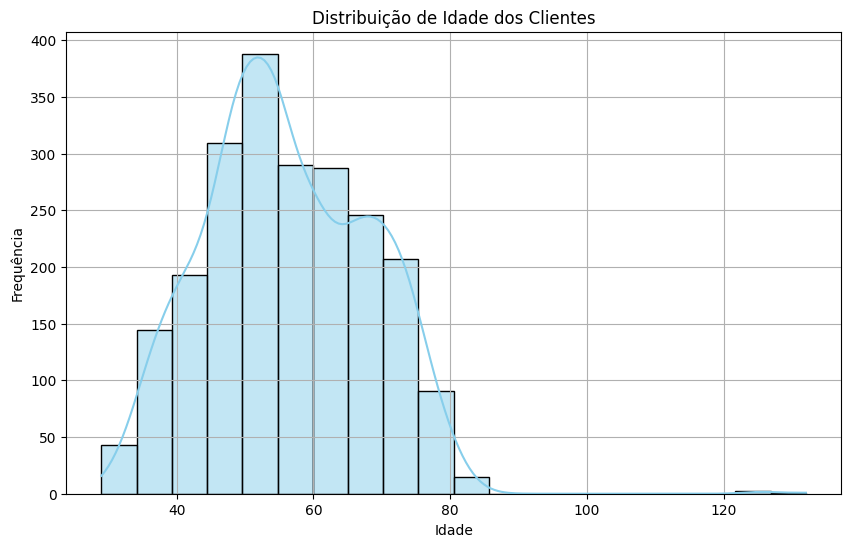

In [71]:
plt.figure(figsize=(10,6))
sns.histplot(df['Idade'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

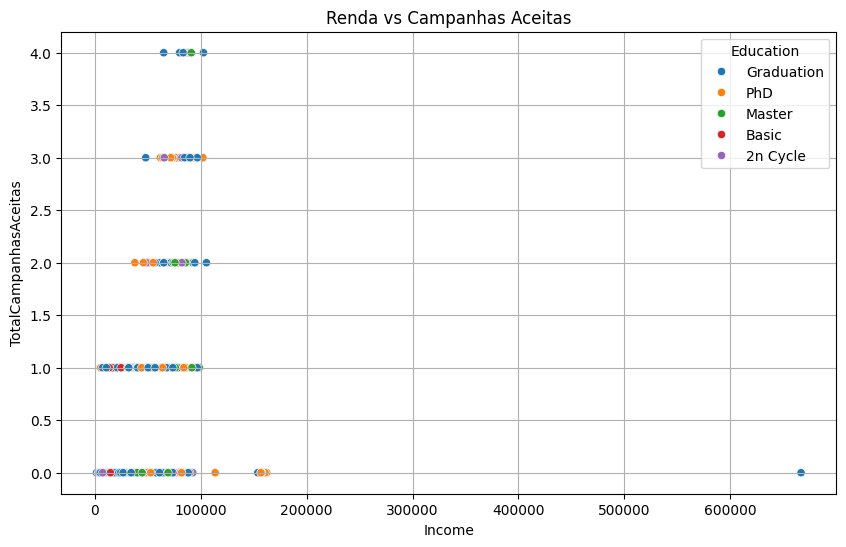

In [72]:
df['TotalCampanhasAceitas'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Income', y='TotalCampanhasAceitas', hue='Education')
plt.title('Renda vs Campanhas Aceitas')
plt.grid(True)
plt.show()

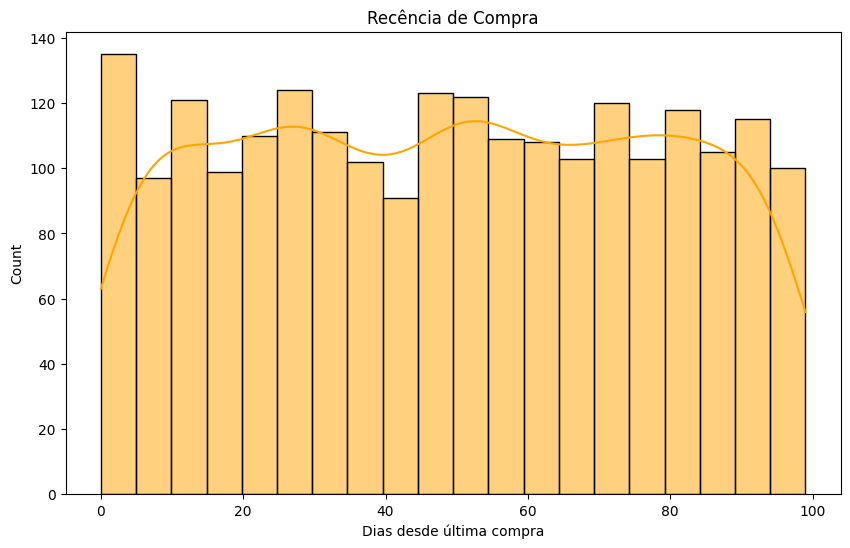

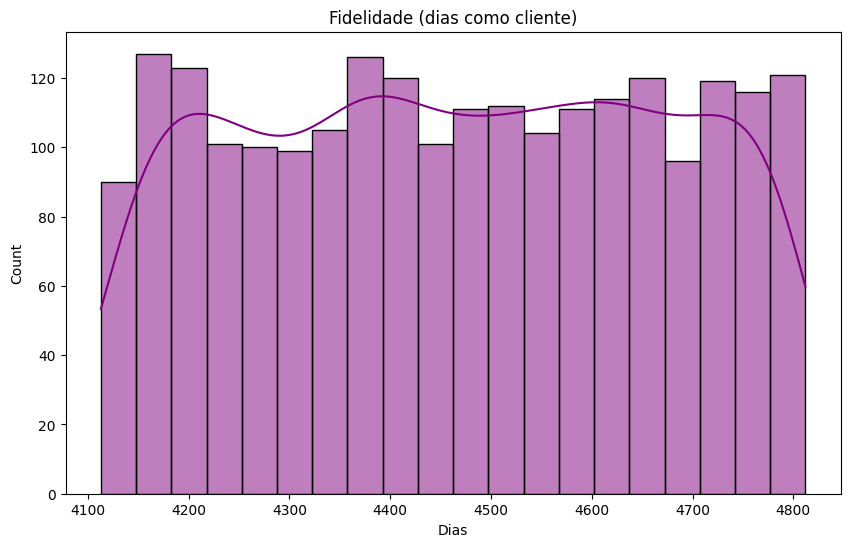

In [74]:
plt.figure(figsize=(10,6))
sns.histplot(df['Recency'], bins=20, kde=True, color='orange')
plt.title('Recência de Compra')
plt.xlabel('Dias desde última compra')
plt.show()

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['FidelidadeDias'] = (pd.to_datetime('2025-10-02') - df['Dt_Customer']).dt.days

plt.figure(figsize=(10,6))
sns.histplot(df['FidelidadeDias'], bins=20, kde=True, color='purple')
plt.title('Fidelidade (dias como cliente)')
plt.xlabel('Dias')
plt.show()